### > Outlier Detection: 
Identifying outliers using techniques like
1. Z-Score,
2. IQR (Interquartile Range), or 
3. visualization tools like box plots.

### > Outlier Handling:
Replacing or transforming outliers based on domain knowledge or by capping/extending the values without using winsorize.Handling Outliers

 1. trimming 
 2. Winsorizing


## Five nuber Summary /Box plot

- minimum value 
- Q1 = 25 percentile 
- median = 50 percentile 
- Q3 = 75 percentile 
- maximum = 100 percentile 

In [65]:
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
lst_marks = [87,45,76,86,67,76,8,78,57,76,45,23,65,75,87,45,8,199]

In [6]:
# 14 ,30,25 percentile value is 

print(np.percentile(lst_marks,[14]))
print(np.percentile(lst_marks , [25]))

[31.36]
[45.]


In [9]:
# create interquartile range 

min,Q1 ,median ,Q3 ,Max = np.quantile(lst_marks ,[0,0.25 ,0.50 ,0.75 ,1])

IQR = Q3 - Q1

print(IQR)

32.5


In [11]:
# decide interquartile range 

lower_fence = Q1 - 1.5*IQR
higher_fence = Q3 + 1.5*IQR

print(lower_fence ,higher_fence)

-3.75 126.25


In [21]:
outliers = [ ]

for i in lst_marks :
    
    if i > -3.77 and i<126.25 :
        print('this is not outlier')
    else:
         outliers.append(i)

this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier
this is not outlier


In [18]:
outliers

[199]

<Axes: >

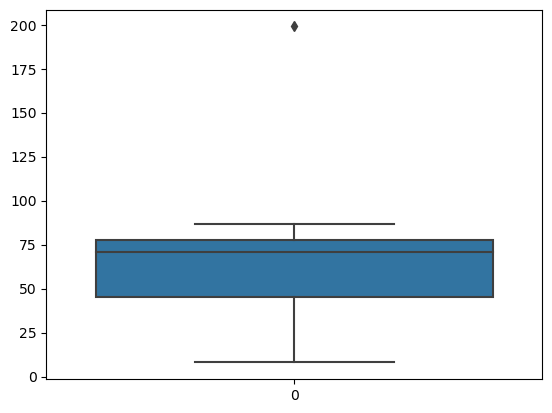

In [20]:

import seaborn as sns

sns.boxplot(lst_marks)

<Axes: >

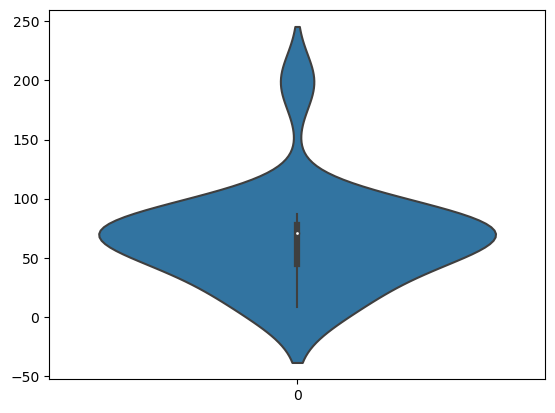

In [23]:

sns.violinplot(lst_marks)

## Handling Outliers 

In [4]:
df = pd.read_csv('weight-height.csv')

In [5]:
df.shape

(10000, 3)

In [7]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: >

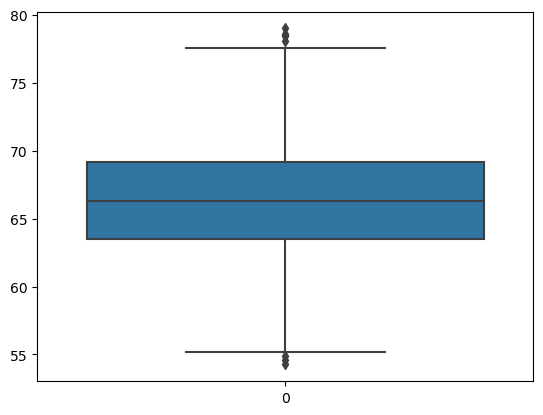

In [10]:
sns.boxplot(df['Height'])

In [11]:
Q1 , Q3 = np.quantile(df['Height'] ,[0.25 , 0.75])

In [13]:
IQR = Q3- Q1
print(IQR)

5.668641245615746


In [15]:
lower_limit = Q1 -1.5*IQR
upper_limit = Q3+ 1.5*IQR

print(lower_limit ,upper_limit)

55.00265861279534 77.67722359525831


### 1. trimimg 

- Trimming. It excludes the outlier values from our analysis.

In [66]:
df1 = df.copy()

<Axes: >

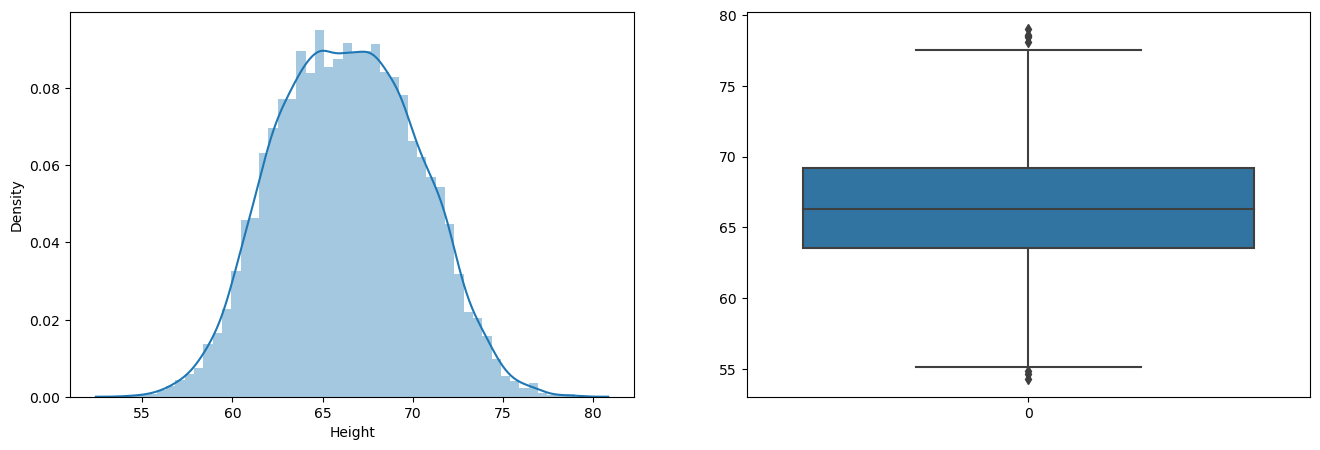

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Height'])

plt.subplot(1,2,2)
sns.boxplot(df1['Height'])


In [69]:
new_df = df[(df['Height'] >= lower_limit) & (df['Height']<= upper_limit)]

<Axes: >

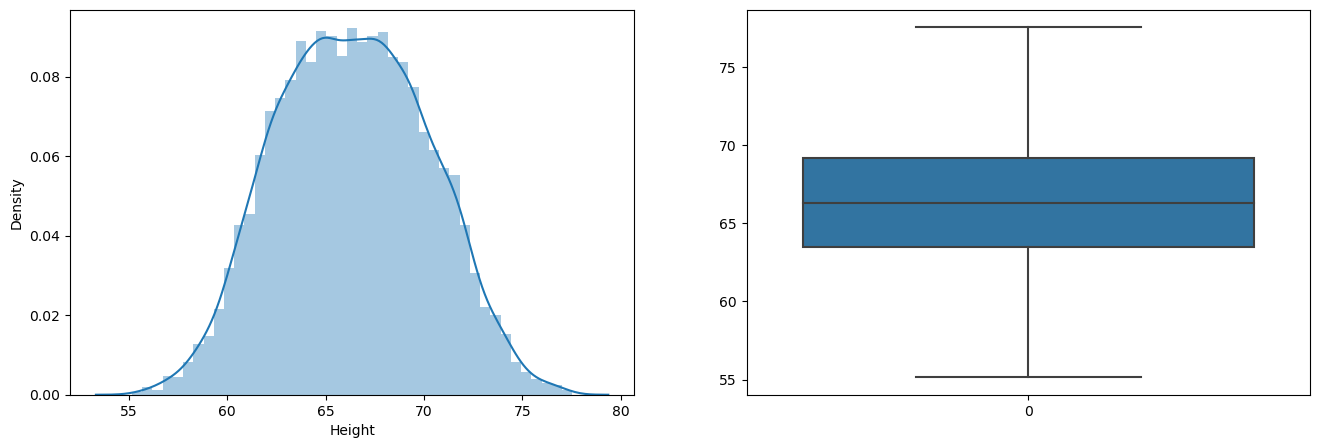

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df['Height'])

plt.subplot(1,2,2)
sns.boxplot(new_df['Height'])


## Winosorization

Winsorization is a way to minimize the influence of outliers in your data by either:

Assigning the outlier a lower weight,
Changing the value so that it is close to other values in the set.

### Methos-1 

In [73]:
df2 = df.copy()

<Axes: >

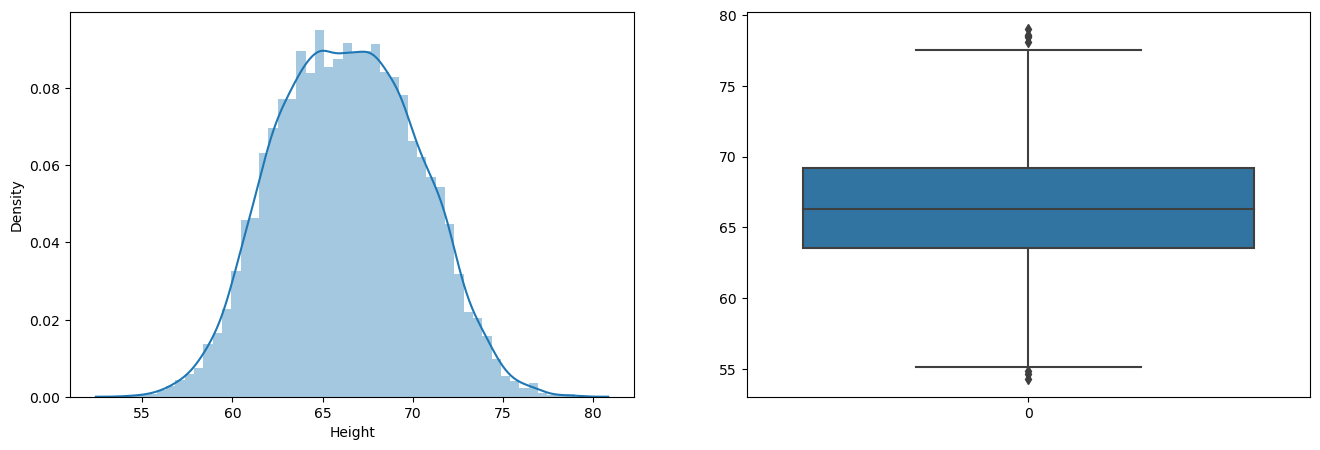

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['Height'])

plt.subplot(1,2,2)
sns.boxplot(df2['Height'])


In [75]:
## Capping --> Winsorization 

df2['Height'] = np.where(df['Height'] <= lower_limit , lower_limit ,
                        np.where(df['Height'] >= upper_limit , upper_limit , 
                                df['Height']))

<Axes: >

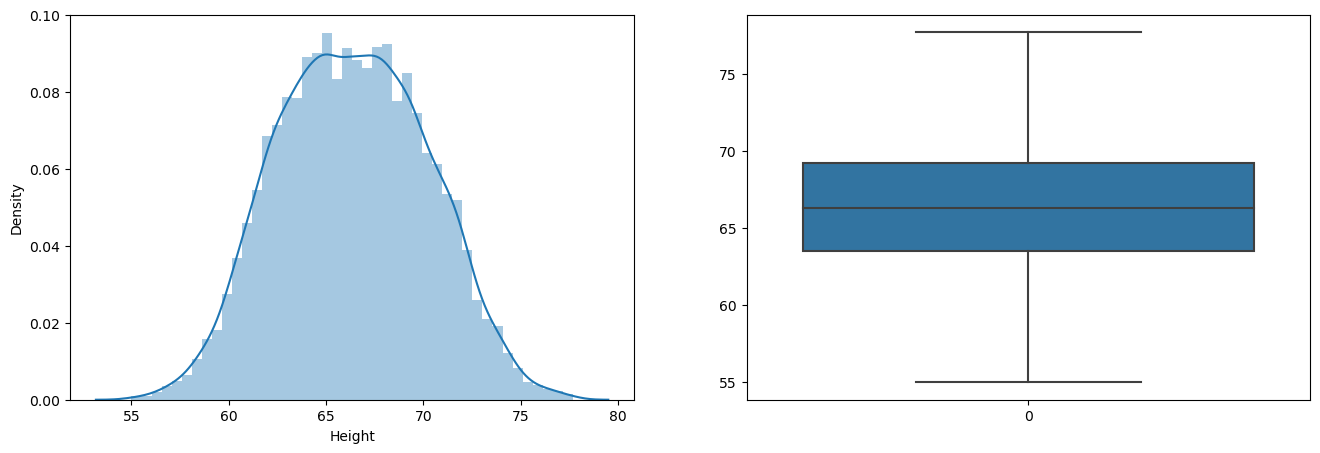

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['Height'])

plt.subplot(1,2,2)
sns.boxplot(df2['Height'])



### Method 2 

In [47]:
from scipy.stats.mstats import winsorize
import numpy as np

In [48]:
df3 = df.copy()

C:\Users\comps\AppData\Local\Temp\ipykernel_9072\1202594078.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: >

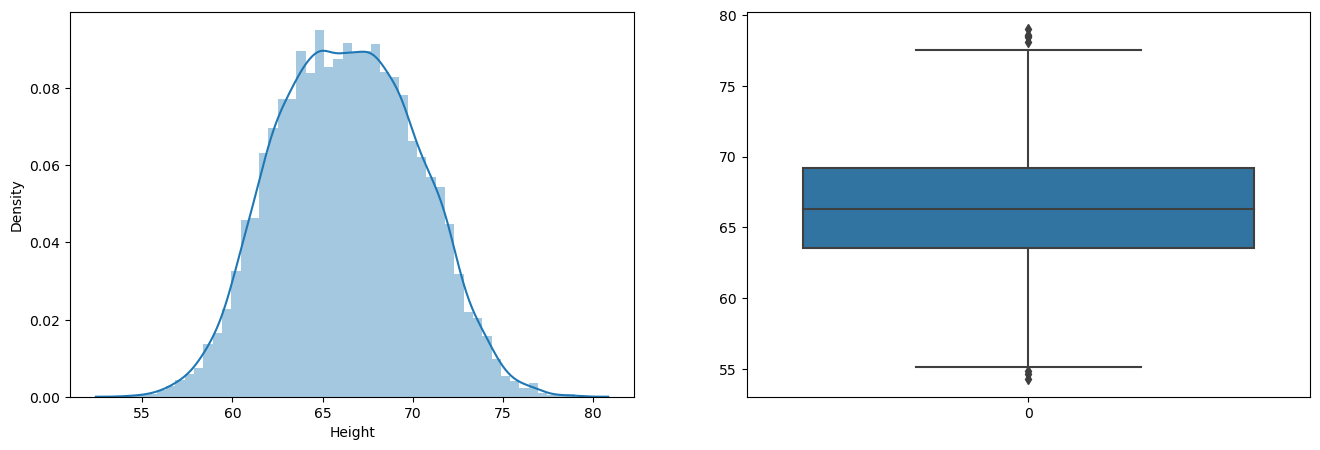

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df3['Height'])

plt.subplot(1,2,2)
sns.boxplot(df3['Height'])


In [50]:
df3['Height'] = winsorize(df3['Height'] , limits = [0.05 , 0.05])

<Axes: >

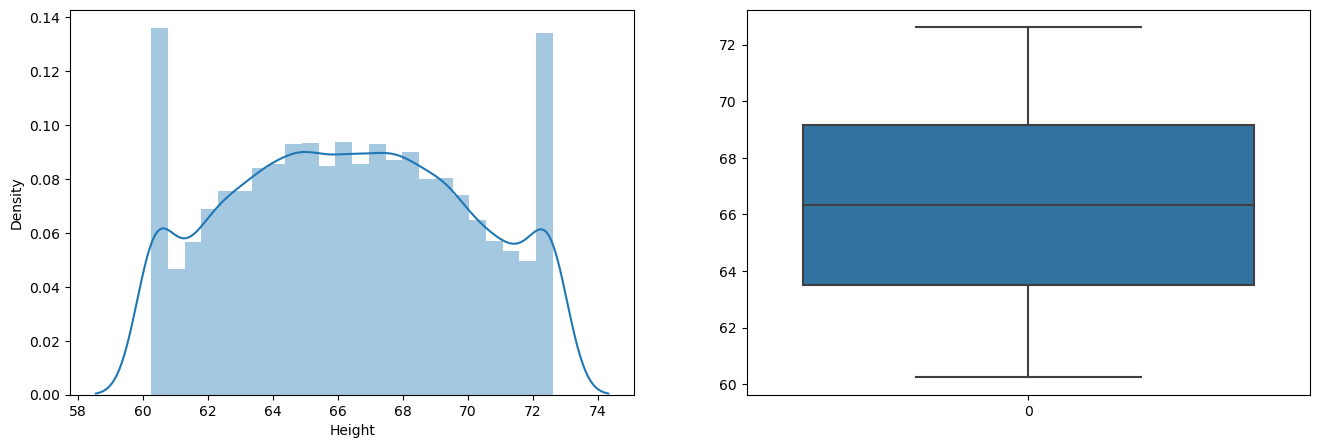

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df3['Height'])

plt.subplot(1,2,2)
sns.boxplot(df3['Height'])
